<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2024-2025/Examens/202406_2oParcial_Programacio%CC%81n_(Soluciones).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MN1: 2n parcial (programació) 13/06/2024**

<hr>

**Nom:**

**NIU:**

**mail (gmail):**

<hr>

**"Instruccions d'edició del Notebook i lliurament"**

*   Obre el Notebook des de GitHub ("Open in Colab") i genera una còpia al teu Drive ("Guardar una còpia a Drive"). Editeu aquesta còpia per a l'examen.
*   Reanomena aquesta còpia utilitzant el teu NIU com a nom de fitxer: "NIU.ipynb" (*per exemple, 2055007.ipynb*).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre els comentaris/feedback sobre el teu examen) a la capçalera d'aquest Notebook.
*   Al final de l'examen, descarrega aquest Notebook en format .ipynb i l'has de pujar a la següent *drop folder*: [Link](https://cern.ch/examendf2024). Assegura't que el fitxer té el nom correcte.
*   Podeu tornar a pujar el fitxer si creieu que hi ha un error, però només considerarem l'última versió, i dins de l'horari establert.
*   **NOTA:** Abans d'entregar o donar per finalitzat cada exercici, és recomanable reiniciar l'entorn d'execució per veure que s'executa tot de manera correcta: "Entorn d'execució >> Reiniciar entorn d'execució", i després "Entorn d'execució >> Executar-ho tot".

<hr>

**Instruccions de l'examen**

*   L'examen es realitza de forma individual.
*   L'horari és de 9h a 12h. No s'acceptaran entregues passada aquesta hora.
*   Podeu consultar apunts, entregues o utilitzar internet per buscar informació, però **NO** comunicar-vos entre vosaltres/es, ni utilitzar ChatGPT, ni Whatsapp, ni missatgeria... Revisarem durant l'examen que no tingueu finestres obertes amb aquestes aplicacions.
*    **NOTA:** Tenim una eina per comparar Notebooks aplicant IA. Si hi ha còpies flagrants, obtindreu un cero, i us cridarem a revisió personalitzada.

<hr>

## **EXAMEN**

In [ ]:
# Executa aquesta part de codi per importar llibreries comunes (afegeix les que creguis necessàries a aquesta llista):

import numpy as np
import matplotlib.pyplot as plt
import math
import random
import scipy.stats as ss

<font color='green'>**> Exercici #1 [4 punts]**</font>

Anem a resoldre numèricament una equació diferencial amb el mètode numèric ([d'Euler](http://en.wikipedia.org/wiki/Euler_method)) i compararem amb la solució analítica de la equació diferencial.

**1.1 [1 punt]:** Defineix dues funcions:

*    Donada una llista de valors x, una funció que ens retorni els valors de la funció:

$y(x)=-\frac{1}{x+1}$

, és a dir: *def solucio(x)*
*    Una altra que li passis límits inferiors i superiors en x, i un interval ϵ, i retorni els parells x,y avaluats tal que:

$$
y_0 = -1 \\
y_1 = y_0 + ϵ (y_0^2) \\
y_2 = y_1 + ϵ (y_1^2) \\
...
$$


és a dir *def euler(xinf,xsup,eps)*. Aquesta funció ha de retornar dues llistes --> *return x_eu, y_eu* i ens dona la solució pel mètode d'Euler.

In [ ]:
def solucio(x):
  return -1/(x+1)

def euler(xinf,xsup,eps):
  x_eu = np.arange(xinf,xsup+eps,eps)
  y_eu = []
  y_eu.append(-1)
  for i in range(len(x_eu)-1):
    y_eu.append(y_eu[-1]+eps*(y_eu[-1]*y_eu[-1]))
  return x_eu,y_eu

**1.2 [2 punts]:** Dibuixa la funció solució a l'interval en x de [0,5], i també els punts que avalues amb el mètode d'Euler en aquest rang per a un ϵ=0.25.

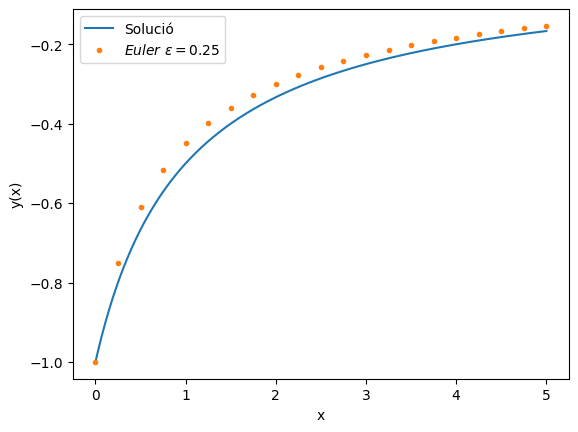

In [ ]:
xinf = 0
xsup = 5
eps = 0.25

xsol = np.linspace(0.0, xsup, 1000)

x_eu, y_eu = euler(xinf,xsup,eps)

plt.plot(xsol,solucio(xsol),label="Solució")
plt.plot(x_eu,y_eu,'.',label=rf'$Euler \ \epsilon={eps}$')
plt.legend()
plt.ylabel("y(x)")
plt.xlabel("x")
plt.show()

**1.3 [1 punt]:** Com veus, hi ha marge de millora... Determina aproximadament quin valor de ϵ hauries de fer servir per a obtenir una diferència màxima entre els punts avaluats d'Euler i la teva funció solució de com a màxim un 1%, de forma relativa. És a dir:

$$
MAX_n ( 100 \cdot |(y_{sol,n}-y_{euler,n})/y_{euler,n}| ) < 1\%
$$


Dibuixa aquest escenari, similar a com has fet 1.2

Aproximadament un epsilon =  0.025


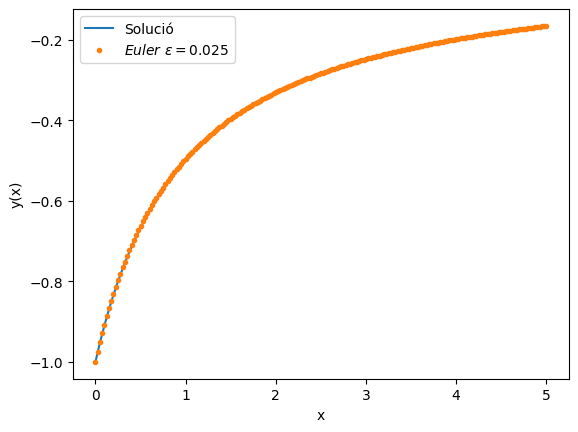

In [ ]:
xinf = 0
xsup = 5
eps = 0.01

e = np.arange(0.,0.255,0.005)
e_reverse=np.sort(e)[::-1]

for eps in e_reverse:
  xsol = np.linspace(0.0, xsup, 1000)
  x_eu, y_eu = euler(xinf,xsup,eps)
  ysol=solucio(x_eu)
  if (np.max(100.*np.abs((ysol-y_eu)/y_eu))) < 1.:
    print("Aproximadament un epsilon = ", eps)
    break

plt.plot(xsol,solucio(xsol),label="Solució")
plt.plot(x_eu,y_eu,'.',label=rf'$Euler \ \epsilon={eps}$')
plt.legend()
plt.ylabel("y(x)")
plt.xlabel("x")
plt.show()

<font color='green'>**> Exercici #2 [4 punts]**</font>

Si generem una llista de $n$ valors $X_1,...,X_n$ que segueixen una distribució uniforme entre 0 i 1, aquests tenen uns valors esperats per a la mitja i la variança de:

$$
\mu = 0.5
$$

$$
Var = ∫_0^1 (x-0.5)^2 dx = \frac{1}{12}
$$

Anem a demostrar que efectivament tenim un estimador de la variança no esbiaixat que és:

$$
s_{ne}^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2
$$

on:

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i
$$

Evidentment l'estimador de la variança esbiaixat és:

$$
s_{e}^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2
$$

Anem a demostrar-ho...

**2.1 [2 punts]:** Genera 100 punts aleatoris segons aquesta distribució uniforme entre 0 i 1, i anem a dibuixar els valors avaluats per a $s_{ne}^2$ i $s_{e}^2$, en funció de $n$. És a dir, una gràfica dels valors dels estimadors  augmentant $n$ de 2 a 100: agafem els dos primers valors, avaluem. Agafem els 3 primers, i avaluem... i així successivament...

Per a un conjunt de valors, la funció $var$ de Numpy ens permet avaluar el valor esbiaixat i el no esbiaixat com:

```
biased = np.var(valors, ddof=0)
unbiased = np.var(valors, ddof=1)
```

Així doncs, genera els 100 punts, i ves avaluant quina pinta tenen aquests valors. Afegeix una línea horitzontal al valor de y=1/12 (variança real!).




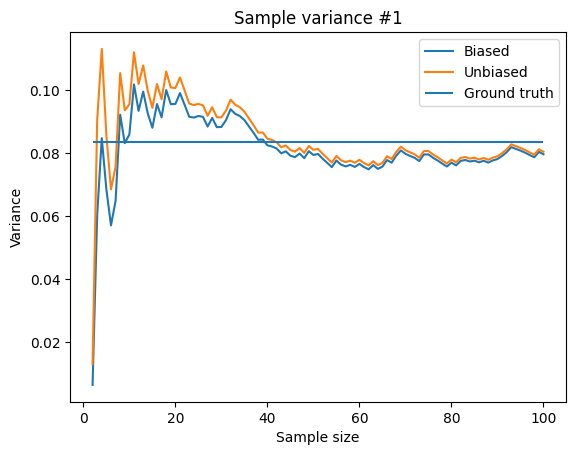

In [ ]:
# Este puede estar bien: https://hippocampus-garden.com/stats_unbiased_variance/

n = 100
rands = np.random.rand(n)
biased = []
unbiased = []
for i in range(2, n+1):
  biased.append(np.var(rands[:i], ddof=0))
  unbiased.append(np.var(rands[:i], ddof=1))

x = np.arange(2, n+1)
plt.plot(x, biased, label="Biased")
plt.plot(x, unbiased, label="Unbiased")
plt.hlines(1/12, x[0], x[-1], label="Ground truth")
plt.xlabel("Sample size")
plt.ylabel("Variance")
plt.legend()
plt.title("Sample variance #1");

**2.2 [2 punts]:** Aquesta gràfica que has fet a 1.1. va canviant cada cop que l'executes. De fet, tots dos estimadors semblen convergir a la variància de la població 1/12 i la variància esbiaixada és lleugerament menor que l'estimador no esbiaixat. No obstant això, a partir d'aquests resultats, és difícil veure quin estimador s'ajusta millor a la variança real...

Per tant, repeteix aquest experiment 10.000 vegades i representa el valor mitjà per a cada punt de $n$, i el valor de 1/12 (variança real).

Veuràs que l'estimador no esbiaixat, en promig, és de fet no esbiaixat, independentment de $n$... cosa que no passa amb l'altre estimador, que es assimptòticament no esbiaixat (s'acosta a 1/12 si n creix suficient, on $n-1$ es pot aproximar de fet a $n$)!

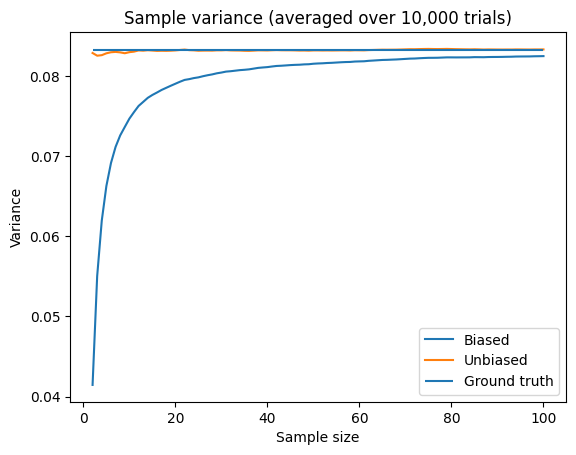

In [ ]:
n = 100
k = 10000
rands = np.random.rand(n, k)
biased = []
unbiased = []
for i in range(2, n+1):
  biased.append(np.var(rands[:i], axis=0, ddof=0).mean())
  unbiased.append(np.var(rands[:i],  axis=0, ddof=1).mean())

x = np.arange(2, n+1)
plt.plot(x, biased, label="Biased")
plt.plot(x, unbiased, label="Unbiased")
plt.hlines(1/12, x[0], x[-1], label="Ground truth")
plt.xlabel("Sample size")
plt.ylabel("Variance")
plt.legend()
plt.title("Sample variance (averaged over 10,000 trials)");

<font color='green'>**> Exercici #3 [2 punts]**</font>

El mètode **Multiplicative Linear Congruential Generator** s'usa per generar nombres aleatoris entre 0 i 1. El mètode consisteix a començar amb un nombre enter arbitrari, $z_0$ (al qual s'anomena “llavor”), comprès entre 0 i un nombre sencer gran, $m$, tots dos elegits i fixats per nosaltres.

Per generar un altre nombre enter entre 0 i $m$ es procedeix segons:

$$
z_{n+1} = mod(a·z_n + b, m)
$$

on $a$ i $b$ són constants convenientment triades, i on $mod(x, m)$ és la resta de dividir $x$ entre $m$. Per obtenir una seqüència de nombres reals entre 0 i 1 dividim els anteriors per $m$.

Si partim de la mateixa llavor, donats $a$, $b$ i $m$, la seqüència de nombres aleatoris és la mateixa.

Hi ha diversos valors que es poden utilitzar (https://ca.wikipedia.org/wiki/Generador_lineal_congruencial). En aquest exercici farem servir un $z_0 = 10$ i els valors que s'usen a *Numerical Recipes*:

$a = 1664525$

$b = 1013904223$

$m = 2·10^{32}$

**3.1 [1 punt]** Implementa una funció que retorni una llista de N nombres aleatoris entre 0 i 1, implementant el mètode proposat en aquest exercici. Per fer que la funció sigui el més genèrica possible, passa totes les variables com a paràmetres, és a dir:

```
def MLCG(z0,a,b,m,N):
 #el teu codi ...
 # return "llista de N valors entre 0 i 1"
```

In [ ]:
def MLCG(z0,a,b,m,N):
  Np = []
  Np.append(z0)
  for i in range(1,N+1):
    Np.append((a*Np[i-1]+b) % m)
  NpN = [x/m for x in Np] # Normalizado entre 0 y 1
  return NpN

**3.2 [1 punt]** Genera $10^6$ nombres aleatoris entre 0 i 1 usant la teva funció *MLCG()* i dibuixa un histograma normalitzat dels valors (*emprant* 50 bins). Si està ben fet, hauries de veure un histograma compatible amb una distribució uniforme entre 0 i 1.

[5e-32, 5.152747365e-24, 8.57688187724774e-18, 1.4276434306730864e-11, 2.3763481814411193e-05, 0.5549095671327883, 0.8472317043109059, 0.3526181105732921, 0.6605020091115952, 0.10671647796491228, 0.24548454560834007]


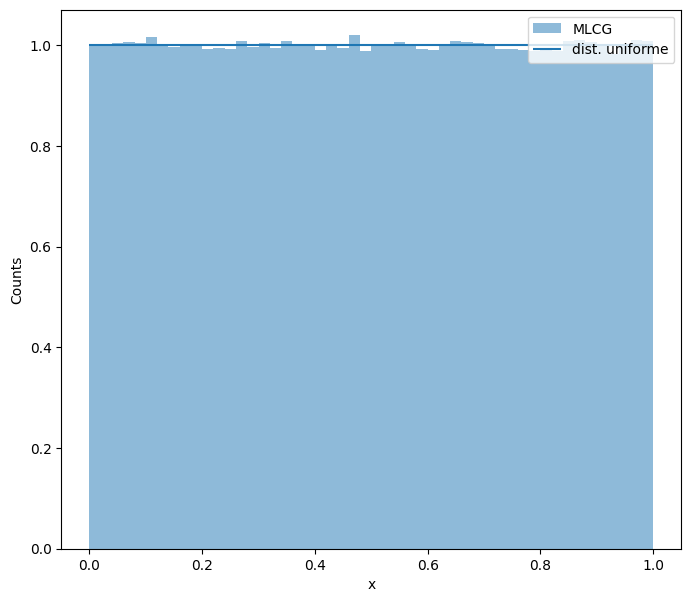

In [ ]:
z0 = 10
a = 1664525
b = 1013904223
m = 2*10**32

p = MLCG(z0,a,b,m,10**6)

print(MLCG(z0,a,b,m,10)) # J. Flix (test)

plt.figure(figsize=(8, 7))
plt.hist(p, bins=50, density=True, alpha=0.5, label="MLCG")
plt.hlines(1.,0.0,1.0,label="dist. uniforme")
plt.ylabel("Counts")
plt.xlabel("x")
plt.legend()
plt.show()